In [1]:
from exp.nb_DatasetManager import DatasetManager, resize_one
from exp.nb_Tesis import *
from exp.nb_ARLcompare import *
from exp.nb_trainer import *

In [2]:
# TODO: rehacer dataset
dm = DatasetManager('2019','train_images',300,700, year_to_train_for='2018')

In [3]:
# dm.generate_dataset(force=True)

In [54]:
for img, item in zip(data.train_ds,data.items):
    if img[0].shape[1] != 300 or img[0].shape[2] != 300:
        print('removing', item,img[0].shape[1)
#         !rm -rf $item

SyntaxError: invalid syntax (<ipython-input-54-5a5def4d8a4b>, line 3)

In [4]:
dm.get_dataset_path()

PosixPath('2019_train_images_resized_to_300_picked_700_training_for_2018')

In [ ]:
len(dm.get_dataset_path().ls())

In [52]:
def reload_dataset(imgs_folder):
    random_seed(1,True)
    tfms = get_transforms(flip_vert=True, max_rotate=180,max_zoom=1.1, max_lighting=.2,p_affine=1, max_warp=0)

    data = ImageList.from_folder(imgs_folder)\
    .split_by_rand_pct()\
    .label_from_func(dm.get_label_for_image_path)\
    .transform(tfms)\
    .databunch(bs=16)\
    .normalize(imagenet_stats)
    return data

data = reload_dataset(dm.get_dataset_path())

You can deactivate this warning by passing `no_check=True`.


/home/mike/miniconda3/lib/python3.7/site-packages/fastai/basic_data.py:272: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 400]), torch.Size([3, 300, 400]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300]), torch.Size([3, 300, 400]), torch.Size([3, 300, 300]), torch.Size([3, 300, 300])], [(), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ()]]
  warn(message)


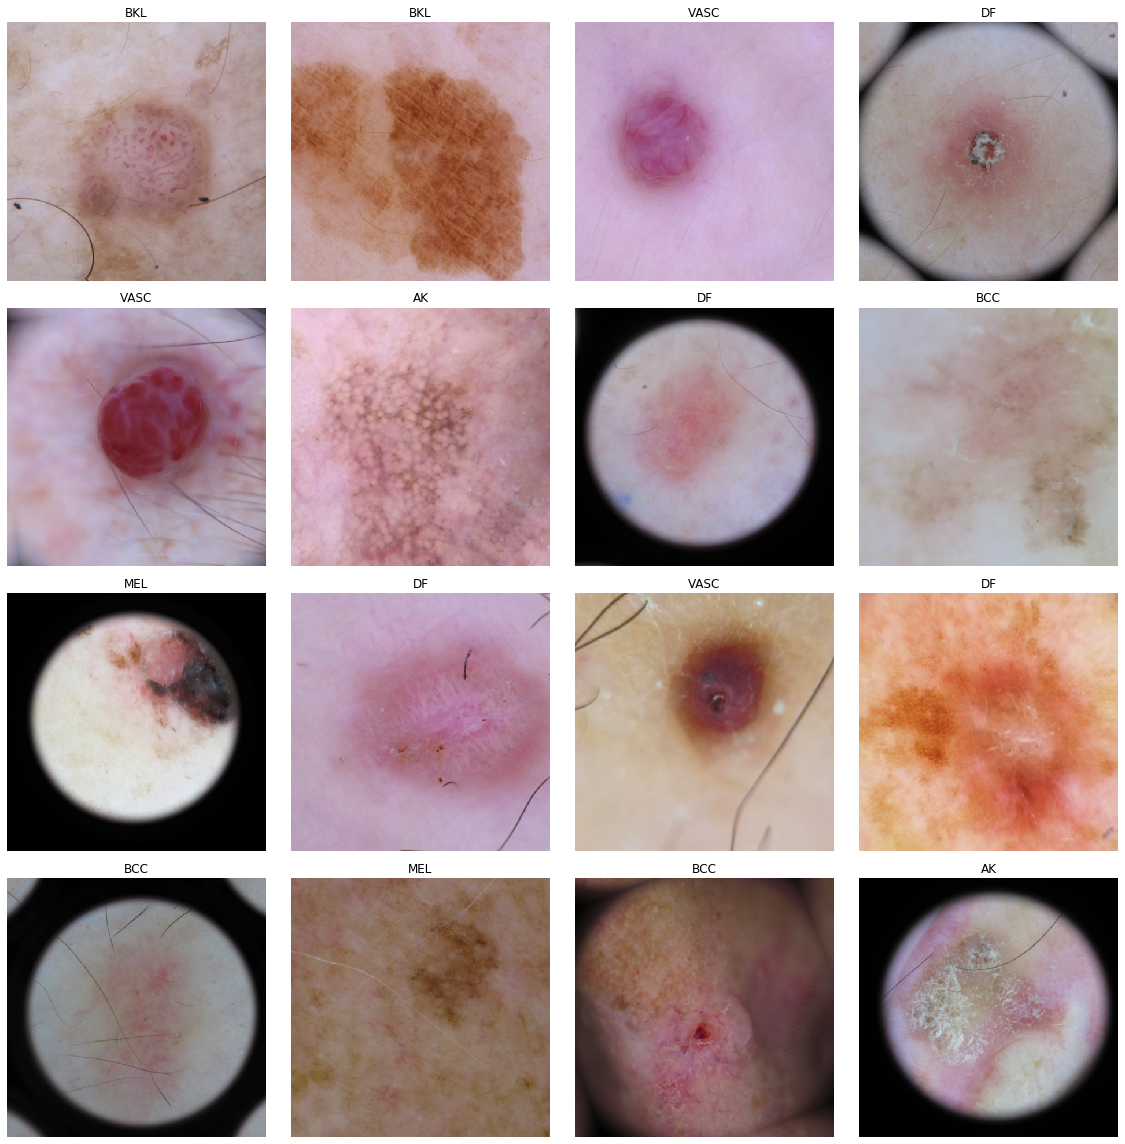

In [94]:
data.show_batch(40,ds_type=DatasetType.Train)

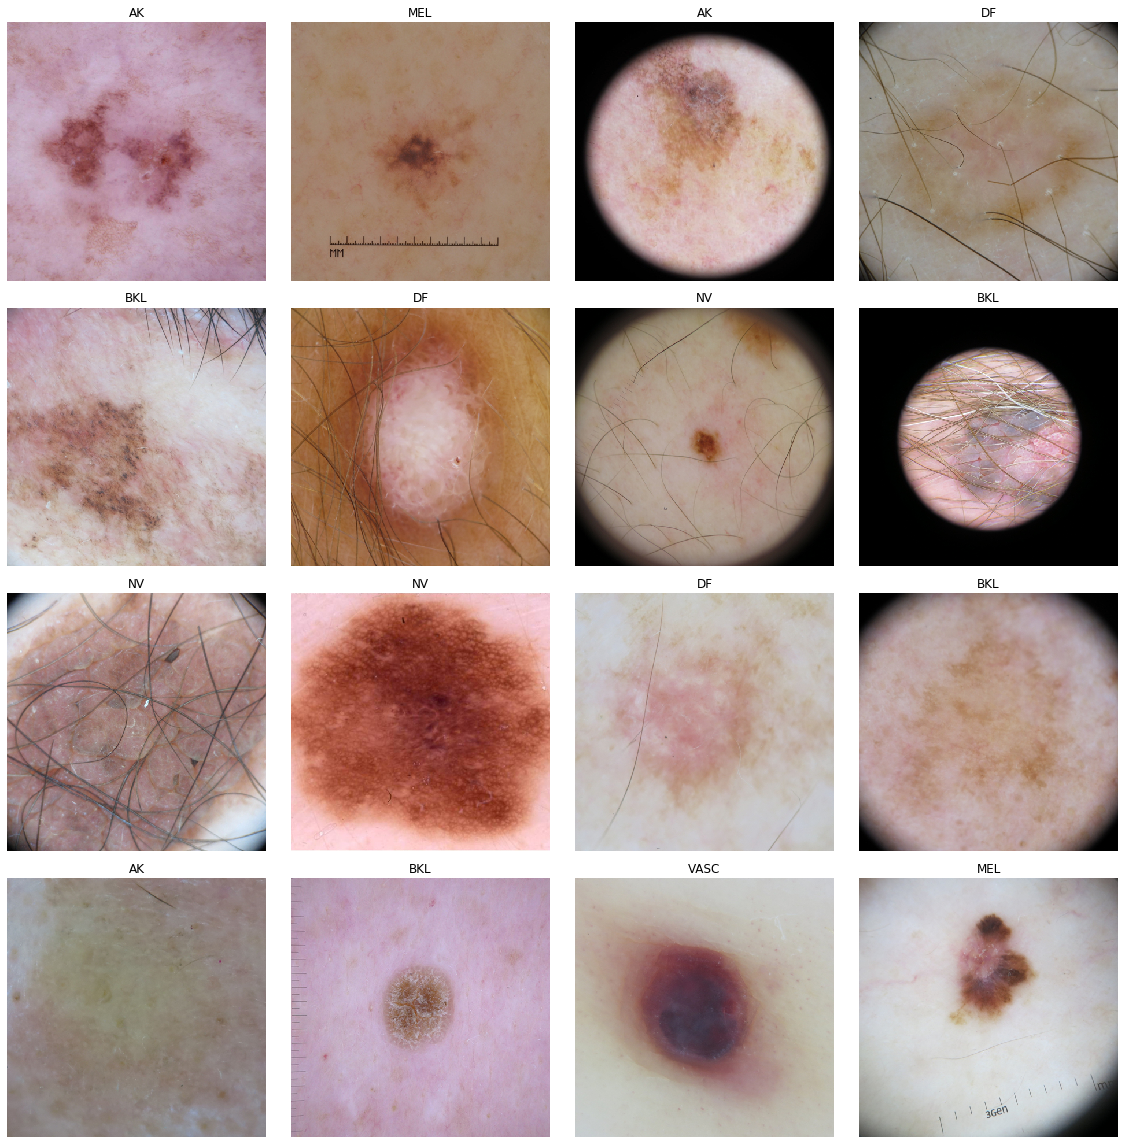

In [95]:
data.show_batch(50,ds_type=DatasetType.Valid)

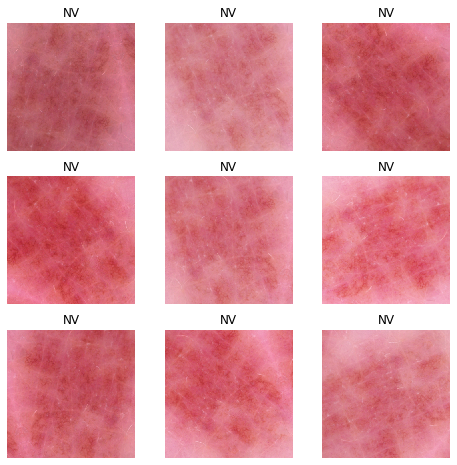

In [98]:
def _plot(i,j,ax):
    x,y = data.train_ds[1]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [7]:
train_count,valid_count = pd.value_counts(data.train_ds.y.items),pd.value_counts(data.valid_ds.y.items)
train_count.index,valid_count.index = [data.classes[i] for i in train_count.index],[data.classes[i] for i in valid_count.index]

print('train_count: \n',train_count,'\n\n','valid_count: \n', valid_count)
print('ratios:')
print(valid_count / train_count, '%')

train_count: 
 BCC     252
MEL     246
BKL     241
NV      230
AK      230
VASC    206
DF      189
dtype: int64 

 valid_count: 
 NV      70
AK      70
BKL     59
MEL     54
DF      50
BCC     48
VASC    47
dtype: int64
ratios:
AK      0.304348
BCC     0.190476
BKL     0.244813
DF      0.264550
MEL     0.219512
NV      0.304348
VASC    0.228155
dtype: float64 %


In [112]:
m.split(lambda x: x[13])

AttributeError: 'Sequential' object has no attribute 'split'

# How to load a pretrained efficientnet with custom head

In [8]:
import geffnet

In [9]:
random_seed(1,True)
m = partial(geffnet.create_model,'efficientnet_b3', as_sequential=True)
learn_b3 = cnn_learner(data, m, metrics=[error_rate,accuracy],
                        callback_fns=[ShowGraph], 
                        pretrained=True)

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]


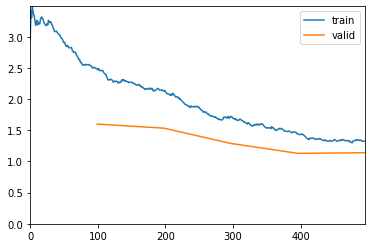

Better model found at epoch 0 with accuracy value: 0.4773869216442108.
Better model found at epoch 1 with accuracy value: 0.49497488141059875.
Better model found at epoch 2 with accuracy value: 0.5552763938903809.
Better model found at epoch 3 with accuracy value: 0.5829145908355713.


In [10]:
train_learner(learn_b3,epochs=5)

In [11]:
learn_b3.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [40, 150, 150]       1,080      False     
______________________________________________________________________
BatchNorm2d          [40, 150, 150]       80         True      
______________________________________________________________________
SwishJit             [40, 150, 150]       0          False     
______________________________________________________________________
Conv2d               [40, 150, 150]       360        False     
______________________________________________________________________
BatchNorm2d          [40, 150, 150]       80         True      
______________________________________________________________________
SwishJit             [40, 150, 150]       0          False     
______________________________________________________________________
AdaptiveAvgPool2d    [40, 1, 1]           0          False     
___________________________________________________

In [12]:
learn_b3.unfreeze()

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]


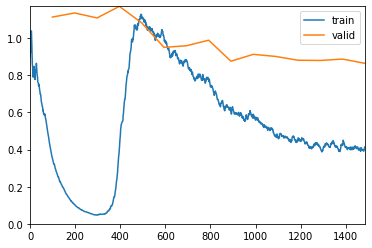

Better model found at epoch 0 with accuracy value: 0.5854271650314331.
Better model found at epoch 2 with accuracy value: 0.6030150651931763.
Better model found at epoch 4 with accuracy value: 0.6306532621383667.
Better model found at epoch 5 with accuracy value: 0.6482412219047546.
Better model found at epoch 6 with accuracy value: 0.6557788848876953.
Better model found at epoch 7 with accuracy value: 0.6708542704582214.
Better model found at epoch 8 with accuracy value: 0.7110552787780762.
Better model found at epoch 10 with accuracy value: 0.713567852973938.
Better model found at epoch 11 with accuracy value: 0.7185929417610168.
Better model found at epoch 12 with accuracy value: 0.7211055159568787.
Better model found at epoch 14 with accuracy value: 0.733668327331543.


In [13]:
train_learner(learn_b3,epochs=15, lr=1e-4)

In [15]:
learn_b3.save('effb3-73acc')

In [7]:
learner = cnn_learner(data,models.resnext101_32x8d, metrias=[accuracy],callback_fns=[
                            ShowGraph,
                            ActivationStats
                                ])

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]


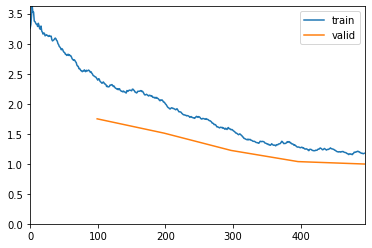

Better model found at epoch 0 with accuracy value: 0.49246230721473694.
Better model found at epoch 1 with accuracy value: 0.5402010083198547.
Better model found at epoch 2 with accuracy value: 0.5502512454986572.
Better model found at epoch 3 with accuracy value: 0.6407034993171692.


In [9]:
train_learner(learner,epochs=5)

In [11]:
learner.unfreeze()

In [12]:
learner.save('stage-1')

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]


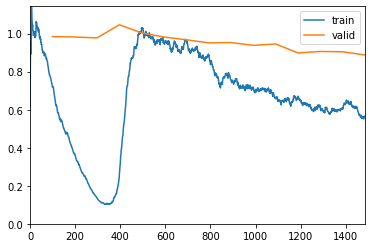

Better model found at epoch 0 with accuracy value: 0.6532663106918335.
Better model found at epoch 5 with accuracy value: 0.6733668446540833.
Better model found at epoch 8 with accuracy value: 0.7010050415992737.
Better model found at epoch 12 with accuracy value: 0.7185929417610168.


In [13]:
train_learner(learner,epochs=15, lr=1e-5)

In [17]:
learner.save('stage-2')

In [91]:
learner.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1594 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BCC,NV,NV,VASC,VASC
Path: 2019_train_images_resized_to_448_picked_300_training_for_2018;

Valid: LabelList (398 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AK,MEL,AK,DF,BKL
Path: 2019_train_images_resized_to_448_picked_300_training_for_2018;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

In [92]:
learner.split(lambda m: m[0][7][2].bn3)

Learner(data=ImageDataBunch;

Train: LabelList (1594 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BCC,NV,NV,VASC,VASC
Path: 2019_train_images_resized_to_448_picked_300_training_for_2018;

Valid: LabelList (398 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AK,MEL,AK,DF,BKL
Path: 2019_train_images_resized_to_448_picked_300_training_for_2018;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

In [93]:
learner.freeze_to(1); learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [256, 56, 56]        16,384     False     
______________________________________________________________________
BatchNorm2d          [256, 56, 56]        512        True      
______________________________________________________________________
Conv2d               [256, 56, 56]        18,432     False     
___________________________________________________

In [94]:
def reload_dataset(imgs_folder):
    random_seed(1,True)
    tfms = get_transforms(flip_vert=True, max_rotate=180,max_zoom=1.8, max_lighting=.3,p_affine=1, max_warp=0)

    data = ImageList.from_folder(imgs_folder)\
    .split_by_rand_pct()\
    .label_from_func(dm.get_label_for_image_path)\
    .transform(tfms,size=320)\
    .databunch(bs=16)\
    .normalize(imagenet_stats)
    return data

data = reload_dataset(dm.get_dataset_path())

In [95]:
learner.data = data

In [96]:
learner.save('beforefinetuning')

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]


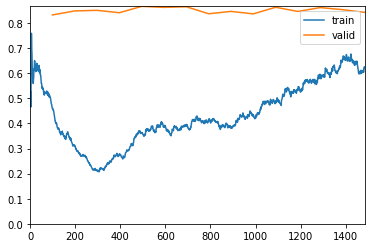

Better model found at epoch 0 with accuracy value: 0.7160804271697998.
Better model found at epoch 9 with accuracy value: 0.7211055159568787.
Better model found at epoch 10 with accuracy value: 0.7261306643486023.


In [97]:
train_learner(learner,epochs=15, lr=1e-5)

In [99]:
learner.save('afterfinetuning')

In [8]:
learner.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1594 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BCC,NV,NV,VASC,VASC
Path: 2019_train_images_resized_to_448_picked_300_training_for_2018;

Valid: LabelList (398 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AK,MEL,AK,DF,BKL
Path: 2019_train_images_resized_to_448_picked_300_training_for_2018;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

In [36]:
test_dm = DatasetManager('2018','test_images',300,'all','2018')

In [37]:
test_dm.generate_dataset()

here
resizing to 300 into 2018_test_images_resized_to_300_picked_all_training_for_2018


PosixPath('2018_test_images_resized_to_300_picked_all_training_for_2018')

In [41]:
learn_b3.data.add_test(ImageList.from_folder(test_dm.get_dataset_path()))

In [42]:
assert len(learn_b3.data.test_ds) == 1512

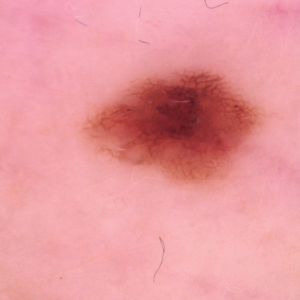

In [43]:
learn_b3.data.test_ds[0][0]

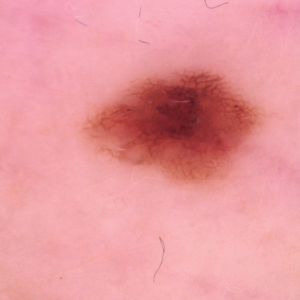

In [40]:
learn_b3.data.test_ds[0][0]

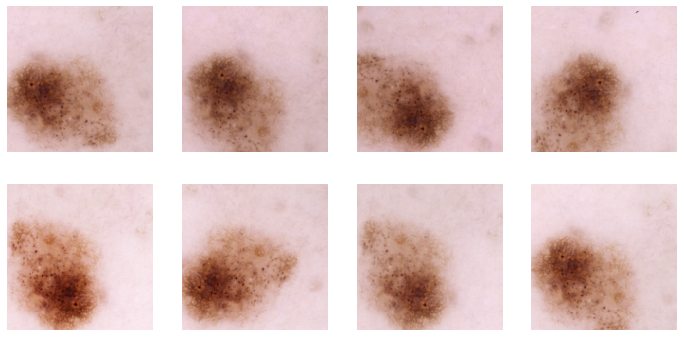

In [28]:

augm_tfm = [o for o in learn_b3.data.train_ds.tfms if o.tfm not in
            (crop_pad, flip_lr, dihedral, zoom)]
row = 0 
col = 1
flip = 0
scale = 1.35

d = {'row_pct':row, 'col_pct':col, 'is_random':False}
tfm = [*augm_tfm, zoom(scale=scale, **d), crop_pad(**d)]

def plots_tfms(im, rows, cols, width, height, **kwargs):
    [im.apply_tfms(tfm, **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    

plots_tfms(learn_b3.data.test_ds[6][0], 2, 4, 12, 6)

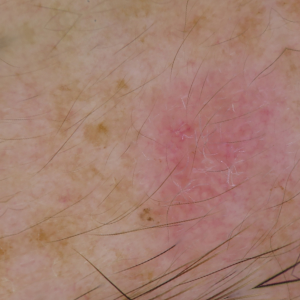

In [26]:
learn_b3.data.train_ds[12][0]

In [32]:
preds, y = learn_b3.TTA(ds_type=DatasetType.Test, beta=0.4, scale=1.35)

In [35]:
cols = ['image'] + learn_b3.data.classes


predictions = []
for idx, filePath in enumerate(learn_b3.data.test_ds.items):
    row = {}
    current_pred = preds[idx]
    row['image'] = filePath.name.replace('.jpg','')
    for idx2, cat in enumerate(learn_b3.data.classes):
        row[cat] = current_pred[idx2].item()

    predictions.append(row)

predictionsDf = pd.DataFrame(predictions, columns=cols);



print(len(predictionsDf))
predictionsDf = predictionsDf.rename(columns={'AK':'AKIEC'})
predictionsDf.head()
predictions_csv_path = f'effb3.csv'
predictionsDf.to_csv(predictions_csv_path, index=False)

1512


### https://github.com/MicPie/fastai_course_v3/blob/master/L1-stonefly_activations_v2.ipynb

In [21]:
layers = flatten_model(learner.model)

In [23]:
len(layers)

100

In [24]:
hooks = hook_outputs(layers)

In [28]:
learner.model.eval();


In [33]:
img = open_image(data.items[0])

In [29]:
learner.predict(img)

(Category AK,
 tensor(0),
 tensor([0.6023, 0.0064, 0.0220, 0.0106, 0.2718, 0.0030, 0.0838]))

In [32]:
[hooks.stored[i].shape for i in range(len(hooks.stored))]

[torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 

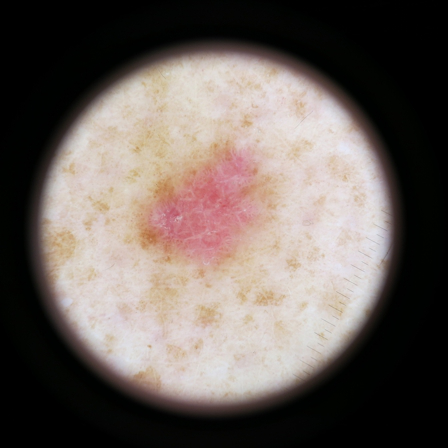

In [34]:
img

In [67]:
custom_hook = hooks

In [73]:
custom_hook.stored[-1].shape

torch.Size([1, 7])

In [36]:
stored_hooks_rank = [len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))]#; stored_hooks_rank


In [75]:
min_rank = min(stored_hooks_rank); min_rank


2

In [38]:
first_flat_layer = stored_hooks_rank.index(min_rank); first_flat_layer


92

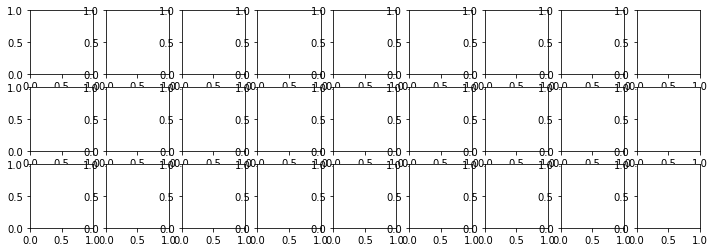

In [76]:
fig, axes = plt.subplots(3, 9, figsize=(12,12/3))


In [63]:
len(axes.flat)

27

In [57]:
layer_number = 0
custom_hook.stored[layer_number][0].shape

torch.Size([64, 112, 112])

In [83]:
cmap = 'inferno'
# Show conv2d layer activation function
def show_2D_act(hook ,l=0, nrows=4, ncols=9, s=12, cmap=cmap):
    '''Show nrows*ncols activation visualizations of the l-th layer with figsize s*s'''
    fig, axes = plt.subplots(nrows, ncols, figsize=(s,s/3))
    fig.subplots_adjust(hspace=0.1, wspace=0, left=0, right=1, top=1, bottom=0)
    for i, ax in enumerate(axes.flat):
        ax.imshow(custom_hook.stored[l][0][i].cpu(), cmap=cmap)
        ax.set_axis_off()

In [84]:
[print(i) for i in range(0,first_flat_layer,20)]

0
20
40
60
80


[None, None, None, None, None]

Layer#: 0
Layer#: 20
Layer#: 40
Layer#: 60
Layer#: 80


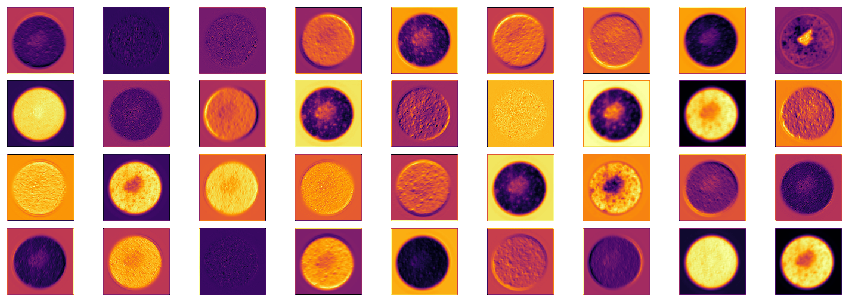

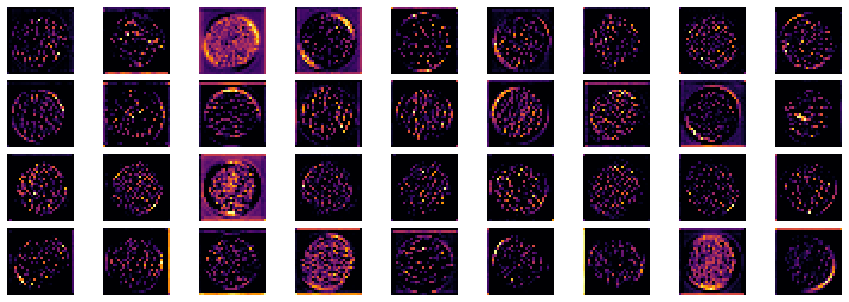

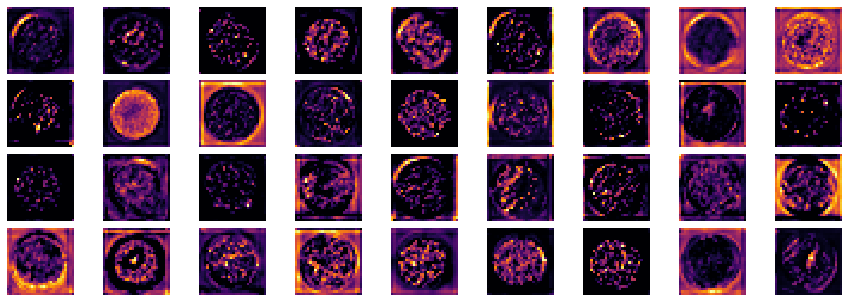

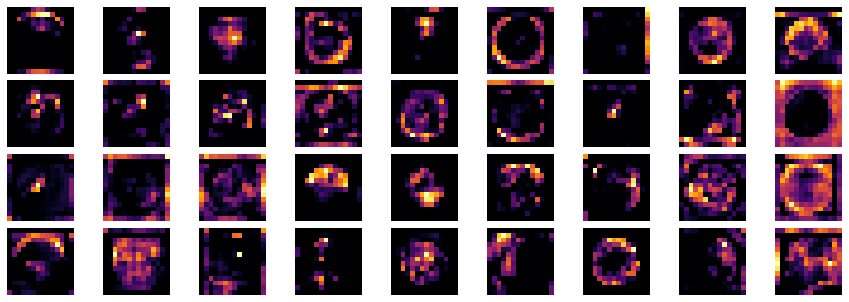

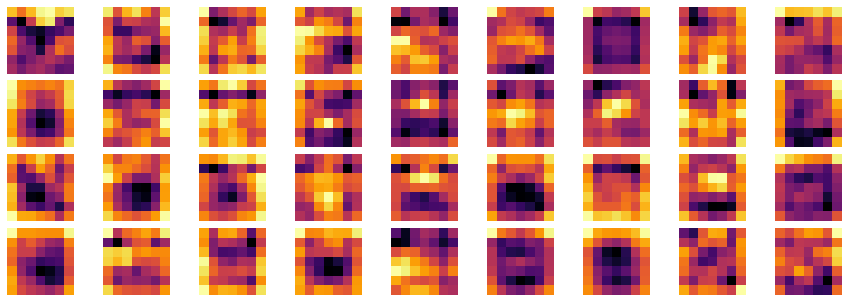

In [85]:
for i in range(0,first_flat_layer,20):
    print('Layer#:',i) # Does not work? Will fix later.
    show_2D_act(custom_hook, i)

In [33]:
torch.tensor(learner.full_picture.stats).shape

torch.Size([131, 76])

In [9]:
learner.unfreeze()

In [11]:
train_learner(learner, lr=1e-5)

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]


Better model found at epoch 0 with accuracy value: 0.6005024909973145.
Better model found at epoch 1 with accuracy value: 0.6030150651931763.


In [12]:
learner.activation_stats

AttributeError: 'Learner' object has no attribute 'activation_stats'

In [18]:
train_learner(learner,'r34')

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]
Saving log on:  2019_imgsz_224_r34


KeyboardInterrupt: 

In [66]:
from torchvision.models.resnet import BasicBlock
import types

In [67]:
r34_attn = models.resnet34(pretrained=True)

In [68]:
%psource BasicBlock

In [78]:
alpha_initial_value = 0.001
def attn_forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        
#         Uncomment this for resnet50
#         out = self.conv3(out)
#         out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

            
        #identity N x C x H x W
        #alpha C
        #out N x C x H x W
        #out * identity * alpha = N x C x H x W
        
            
        out = out + (identity 
                     * self.softmaxLayer(out.view(*out.size()[:2], -1)).view_as(out) 
                     * self.alpha) + (identity)

        out = self.relu(out)
        return out

def add_attn_to_forward_func(a_module):
    a_module.forward = types.MethodType(attn_forward,a_module)
    
def add_attn_params(a_module):
    a_module.softmaxLayer = nn.Softmax(2);
    a_module.alpha = nn.Parameter(torch.tensor(alpha_initial_value))
    print(f'Added attention to {a_module}')
    
    
def change_blocks(a_module, blockClassToChange):
    if not isinstance(a_module, blockClassToChange): return
    add_attn_params(a_module)
    add_attn_to_forward_func(a_module)

In [79]:
def add_attention(net, blockClassToChange):
    apply_leaf(net, partial(change_blocks, blockClassToChange=blockClassToChange))

In [80]:
add_attention(r34_attn, BasicBlock)

Added attention to BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (softmaxLayer): Softmax(dim=2)
)
Added attention to BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (softmaxLayer): Softmax(dim=2)
)
Added attention to BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddin

In [81]:
data = reload_dataset(dm.get_dataset_path())

In [82]:
def getAttnBlocks(net, blockClassAttn):
    return [bn for bn in net.modules() if isinstance(bn,blockClassAttn)]

In [83]:
attn_blocks = getAttnBlocks(r34_attn,BasicBlock)

In [44]:
%psource attn_blocks.forward

In [47]:
%psource HookCallback

In [84]:
class Alphas(ActivationStats):
    def hook(self, m:nn.Module, i:Tensors, o:Tensors)->Tuple[Rank0Tensor,Rank0Tensor]:
        "Take the mean and std of `o`."
        return m.alpha.item(),m.alpha.item()

In [85]:
random_seed(1,True)

learn_attn = cnn_learner(data, lambda x: r34_attn, 
                    metrics=[error_rate,accuracy,AUROC()],
                    callback_fns=[
                            ShowGraph,
                            ActivationStats,
                            partial(Alphas, modules=attn_blocks),
                                ], pretrained=True)
# learn_attn.unfreeze()
# learn_attn.summary()

In [93]:
alphas = [p for name,p in learn_attn.model.named_parameters() if 'alpha' in name]

False

In [ ]:
learn_attn.fit_one_cycle(4)

In [100]:
learn_attn.unfreeze()

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]
Saving log on:  2019_imgsz_224_Resnet50-Attn


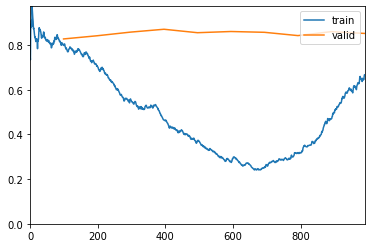

Better model found at epoch 0 with accuracy value: 0.6708542704582214.
Better model found at epoch 2 with accuracy value: 0.6909547448158264.
Better model found at epoch 6 with accuracy value: 0.7010050415992737.
Better model found at epoch 8 with accuracy value: 0.7035176157951355.


RuntimeError: Could not infer dtype of NoneType

In [141]:
train_learner(learn_attn,'Resnet50-Attn',epochs=10,lr=1.74e-05)

In [143]:
s = learn_attn.activation_stats.alphas.stats

In [144]:
s = torch.tensor(s).permute(2,1,0)

In [145]:
s[0][15][989]

tensor(0.0057)

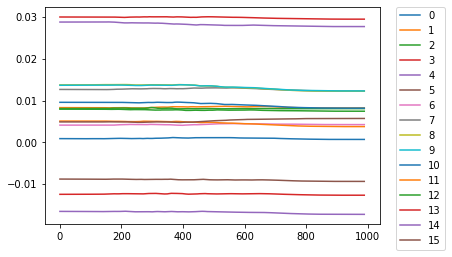

In [146]:
for i in range(len(alphas)):
    plt.plot(s[0][i],label=str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


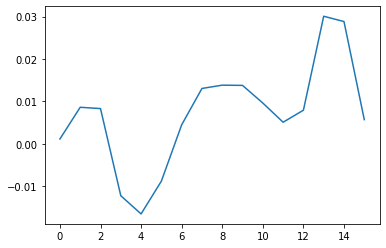

In [147]:
maxvalueforeachalmbda= list(map(lambda x: max(x),s[0]))
plt.plot(maxvalueforeachalmbda)

In [17]:

def get_class_weights(data):
    train_count,valid_count = pd.value_counts(data.train_ds.y.items),pd.value_counts(data.valid_ds.y.items)
    train_count.index,valid_count.index = [data.classes[i] for i in train_count.index],[data.classes[i] for i in valid_count.index]

    weighted_classes = [{c: (sum(train_count) / train_count[c] * len(data.classes))} for c in data.classes];
    print(weighted_classes)
    formatted_weights = [w[c] for c,w in zip(data.classes, weighted_classes) ]
    class_weights=torch.FloatTensor(formatted_weights).cuda()
    class_weights = class_weights / sum(class_weights)
    return class_weights

def train_learner(learner, name, epochs=8, lr=1e-3, wd = 1e-6, balanced=True,seed=1):
    if balanced: learner.loss_func = CrossEntropyFlat(weight = get_class_weights(learner.data))
    random_seed(seed,True)
    log_name = f'2019_imgsz_{learner.data.valid_ds[0][0].shape[1]}_{name}'
    print("Saving log on: ",log_name)
    learner.fit_one_cycle(epochs,max_lr=lr,wd=wd
                          ,callbacks = [
                            SaveModelCallback(learn=learner,name=log_name,monitor='accuracy',),
#                             CSVLogger(learn=learner,filename=log_name),
                            ]
                         )

In [9]:
import geffnet
m = geffnet.create_model('efficientnet_b3', pretrained=True, as_sequential=True)
# m.eval()

In [18]:
learn_b0 = Learner(data,m,metrics=[error_rate,accuracy,AUROC()],
                    callback_fns=[ShowGraph])


In [ ]:
learn_b0.split(lambda x: (x[:13],x[13:]))

In [ ]:
learn_b0.layer_groups

In [62]:
learn_b0.freeze_to(1)

In [ ]:
learn_b0.summary()

In [14]:
Path('2019_train_images_resized_to_448_picked_300_training_for_2018/models').mkdir()

In [19]:
train_learner(learn_b0, 'eff3')

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]
Saving log on:  2019_imgsz_224_eff3


FileNotFoundError: [Errno 2] No such file or directory: '2019_train_images_resized_to_448_picked_300_training_for_2018/models/2019_imgsz_224_eff3.pth'

In [36]:
interp = ClassificationInterpretation.from_learner(learn_b0)

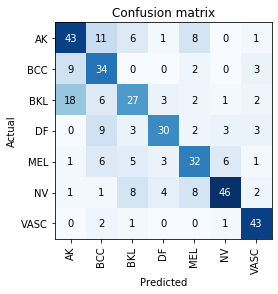

In [38]:
interp.plot_confusion_matrix()

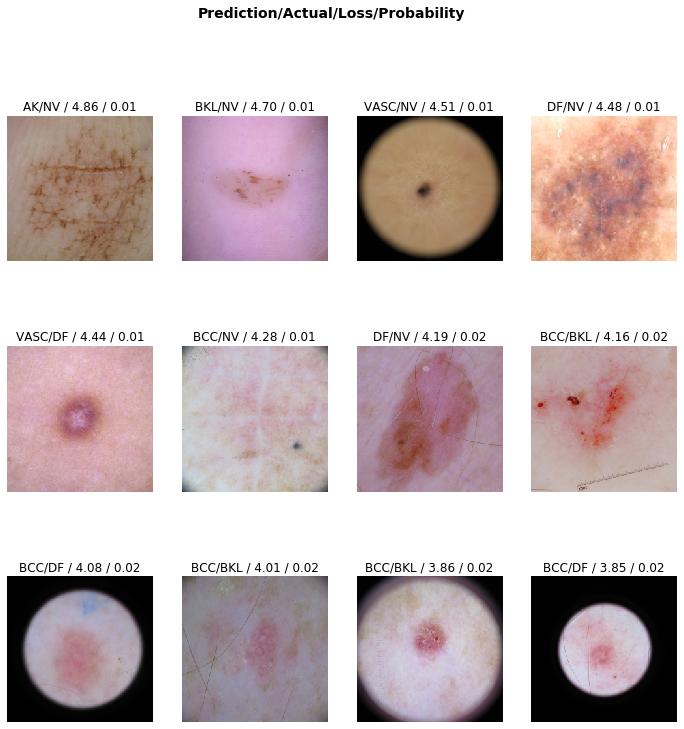

In [41]:
interp.plot_top_losses(12)

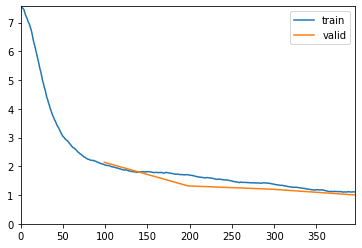

In [35]:
learn_b0.fit_one_cycle(4)

In [65]:
learn_b0.unfreeze()

In [15]:
learn_b0.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 6.31E-08


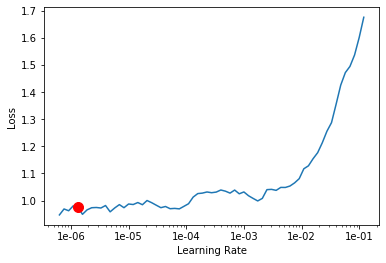

In [16]:
learn_b0.recorder.plot(suggestion=True)

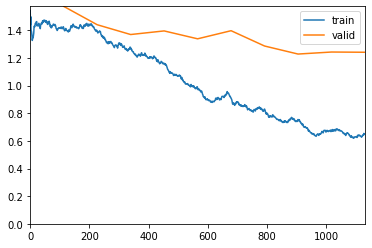

In [68]:
learn_b0.fit_one_cycle(10,max_lr=1.20E-04)

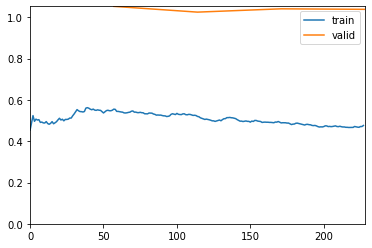

In [12]:
learn_b0.fit_one_cycle(4,max_lr=1e-4)

In [7]:
from torchvision.models.densenet import _DenseBlock


In [8]:
dn = models.densenet201(pretrained=True)

In [13]:
%psource geffnet.efficientnet_builder

In [12]:
%psource models.densenet

In [ ]:
children(dn)

In [158]:
dblocks = getAttnBlocks(dn,_DenseBlock)

In [178]:
dn

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [197]:
random_seed(1,True)

learn_attn = cnn_learner(data, models.densenet201, metrics=[accuracy])

In [198]:
train_learner(learn_attn, 'dense201',epochs=4)

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]
Saving log on:  2019_imgsz_224_dense201


Better model found at epoch 0 with accuracy value: 0.4748743772506714.
Better model found at epoch 1 with accuracy value: 0.6005024909973145.
Better model found at epoch 2 with accuracy value: 0.6281406879425049.
Better model found at epoch 3 with accuracy value: 0.6507537961006165.


In [199]:
learn_attn.unfreeze()

In [200]:
train_learner(learn_attn, 'dense201',epochs=10,lr=1e-5)

[{'AK': 48.51304347826087}, {'BCC': 44.27777777777778}, {'BKL': 46.29875518672199}, {'DF': 59.03703703703704}, {'MEL': 45.357723577235774}, {'NV': 48.51304347826087}, {'VASC': 54.165048543689316}]
Saving log on:  2019_imgsz_224_dense201


Better model found at epoch 0 with accuracy value: 0.6532663106918335.
Better model found at epoch 1 with accuracy value: 0.6582914590835571.
Better model found at epoch 2 with accuracy value: 0.6683416962623596.
Better model found at epoch 4 with accuracy value: 0.6758794188499451.
Better model found at epoch 5 with accuracy value: 0.6834170818328857.
Better model found at epoch 6 with accuracy value: 0.6909547448158264.
Better model found at epoch 7 with accuracy value: 0.6934673190116882.
Better model found at epoch 9 with accuracy value: 0.69597989320755.


In [203]:
SaveModelCallback()

TypeError: unsupported operand type(s) for +: 'PosixPath' and 'Sequential'

In [188]:
dblocks = getAttnBlocks(learn_attn.model, _DenseBlock)

In [191]:
first_dblock = dblocks[0]


In [192]:
%psource first_dblock.forward

In [170]:
learn_attn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

In [161]:
children(dblocks[0])

[_DenseLayer(
   (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu1): ReLU(inplace=True)
   (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu2): ReLU(inplace=True)
   (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 ),
 _DenseLayer(
   (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu1): ReLU(inplace=True)
   (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu2): ReLU(inplace=True)
   (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 ),
 _DenseLayer(
   (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu1): ReLU(inplace=True)
